In [49]:
import torch
from torch import nn
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import zipfile
from pathlib import Path
import requests

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [51]:
import os

for dirpaths, dirnames, filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpaths}")

There are 2 directories and 0 files in data/pizza_steak_sushi
There are 3 directories and 0 files in data/pizza_steak_sushi/train
There are 0 directories and 75 files in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 files in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 files in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 files in data/pizza_steak_sushi/test
There are 0 directories and 19 files in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 files in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 files in data/pizza_steak_sushi/test/sushi


In [52]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/2881783.jpg
Image class: steak
Image height: 512
Image width: 512


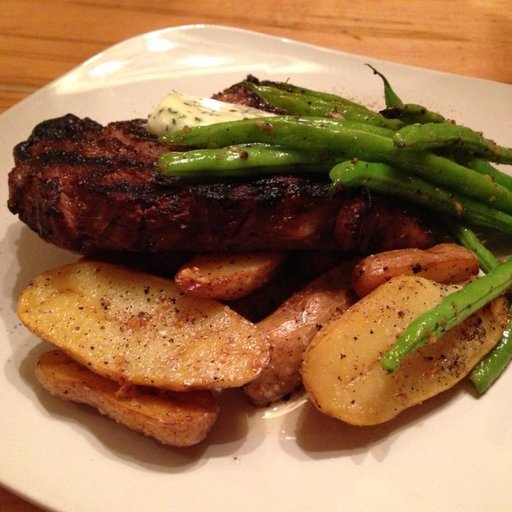

In [53]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [54]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

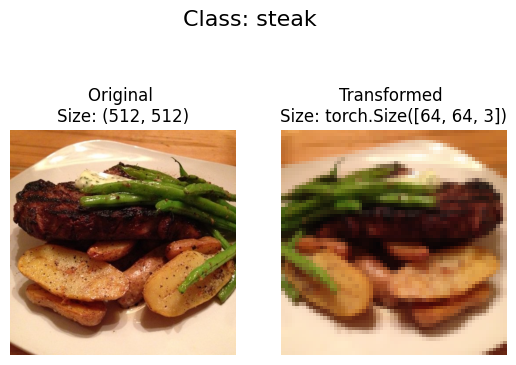

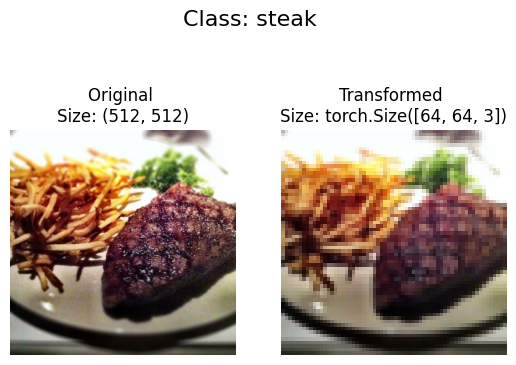

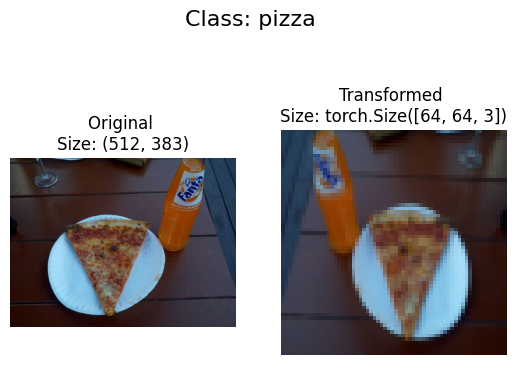

In [55]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [56]:
from torchvision import datasets

train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
    target_transform=None
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [57]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [58]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [59]:
len(train_data), len(test_data)

(225, 75)

In [60]:
# Method 1: Using well written class methods torchvision.datasets.ImageFolder && torch.utils.data.DataLoader to construct the dataloader

train_loader = DataLoader(
    dataset=train_data,
    batch_size=1,
    num_workers=1,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_data,
    batch_size=1,
    num_workers=1,
    shuffle=False
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fef92f60580>,
 <torch.utils.data.dataloader.DataLoader at 0x7feee1a24760>)

In [61]:
img, label = next(iter(train_loader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [62]:
# Method 2: Custom dataloader mannually
# os.scandir is used to find all directories under the given directory.
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    classes = sorted([entry.name for entry in os.scandir(directory)])

    if not classes:
        raise FileExistsError(f"Could not find any classes in {directory}")
    
    class_to_id = {cls_name: i for i , cls_name in enumerate(classes)}
    return classes, class_to_id

In [63]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [64]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
import pathlib

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize with a target_dir and transform (optional) parameter
    def __init__(self, target_dir: str, transforms=None) -> None:
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transforms
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)
    
    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite the __len__() method
    def __len__(self) -> int:
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method
    def __getitem__(self, index) -> tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.stem
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [65]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [66]:
train_custom_data = ImageFolderCustom(
    train_dir,
    train_transforms,
)

test_custom_data = ImageFolderCustom(
    test_dir,
    test_transforms
)

train_custom_data, test_custom_data

(<__main__.ImageFolderCustom at 0x7fef8e0bfe50>,
 <__main__.ImageFolderCustom at 0x7fef8e0bdc30>)

In [67]:
len(train_custom_data), len(test_custom_data)

(225, 75)

In [68]:
train_custom_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [69]:
# Turning custom datasets into DataLoaders
train_dataloader_custom = DataLoader(
    dataset=train_custom_data,
    batch_size=1,
    shuffle=True
)
test_dataloader_custom = DataLoader(
    dataset=test_custom_data,
    batch_size=1,
    shuffle=False
)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fef8e0d8c40>,
 <torch.utils.data.dataloader.DataLoader at 0x7fef8e0bf490>)

In [70]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [71]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [72]:
# Use torchinfo to get an idea of the shapes going through our model
import torchinfo
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [73]:
def accuracy_fn(y_pred, y_true):
    res = torch.eq(y_pred, y_true).sum().item()
    return res / len(y_true) * 100

def train_epoch(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    device: torch.device,
    accuracy_fn
):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_acc += accuracy_fn(y_pred.argmax(dim = -1), y)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [74]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [75]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_epoch(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device,
                                           accuracy_fn=accuracy_fn)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [76]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_custom,
                        test_dataloader=test_dataloader_custom,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  2%|▏         | 1/50 [00:01<00:56,  1.15s/it]

Epoch: 1 | train_loss: 1.1105 | train_acc: 29.3333 | test_loss: 1.0969 | test_acc: 0.4133


  4%|▍         | 2/50 [00:02<00:51,  1.07s/it]

Epoch: 2 | train_loss: 1.0747 | train_acc: 43.1111 | test_loss: 1.0936 | test_acc: 0.4133


  6%|▌         | 3/50 [00:03<00:49,  1.05s/it]

Epoch: 3 | train_loss: 1.0245 | train_acc: 54.6667 | test_loss: 1.0237 | test_acc: 0.5333


  8%|▊         | 4/50 [00:04<00:47,  1.04s/it]

Epoch: 4 | train_loss: 0.9641 | train_acc: 57.3333 | test_loss: 0.9914 | test_acc: 0.5200


 10%|█         | 5/50 [00:05<00:46,  1.04s/it]

Epoch: 5 | train_loss: 0.9080 | train_acc: 57.3333 | test_loss: 0.9557 | test_acc: 0.4667


 12%|█▏        | 6/50 [00:06<00:45,  1.04s/it]

Epoch: 6 | train_loss: 0.8480 | train_acc: 61.3333 | test_loss: 0.9788 | test_acc: 0.4533


 14%|█▍        | 7/50 [00:07<00:44,  1.04s/it]

Epoch: 7 | train_loss: 0.8336 | train_acc: 65.7778 | test_loss: 0.9979 | test_acc: 0.4267


 16%|█▌        | 8/50 [00:08<00:43,  1.03s/it]

Epoch: 8 | train_loss: 0.8170 | train_acc: 62.2222 | test_loss: 0.9715 | test_acc: 0.5067


 18%|█▊        | 9/50 [00:09<00:42,  1.03s/it]

Epoch: 9 | train_loss: 0.7921 | train_acc: 66.2222 | test_loss: 0.9994 | test_acc: 0.4267


 20%|██        | 10/50 [00:10<00:41,  1.03s/it]

Epoch: 10 | train_loss: 0.7581 | train_acc: 64.0000 | test_loss: 1.0015 | test_acc: 0.4800


 22%|██▏       | 11/50 [00:11<00:40,  1.05s/it]

Epoch: 11 | train_loss: 0.7222 | train_acc: 66.6667 | test_loss: 0.9678 | test_acc: 0.4800


 24%|██▍       | 12/50 [00:12<00:39,  1.04s/it]

Epoch: 12 | train_loss: 0.6971 | train_acc: 69.7778 | test_loss: 1.0700 | test_acc: 0.4667


 26%|██▌       | 13/50 [00:13<00:38,  1.04s/it]

Epoch: 13 | train_loss: 0.6530 | train_acc: 71.1111 | test_loss: 1.0041 | test_acc: 0.5200


 28%|██▊       | 14/50 [00:14<00:37,  1.04s/it]

Epoch: 14 | train_loss: 0.6144 | train_acc: 74.2222 | test_loss: 1.0721 | test_acc: 0.5200


 30%|███       | 15/50 [00:15<00:36,  1.04s/it]

Epoch: 15 | train_loss: 0.5341 | train_acc: 77.3333 | test_loss: 1.2393 | test_acc: 0.5333


 32%|███▏      | 16/50 [00:16<00:35,  1.04s/it]

Epoch: 16 | train_loss: 0.5050 | train_acc: 78.2222 | test_loss: 1.2832 | test_acc: 0.5067


 34%|███▍      | 17/50 [00:17<00:34,  1.05s/it]

Epoch: 17 | train_loss: 0.4415 | train_acc: 81.3333 | test_loss: 1.3354 | test_acc: 0.4800


 36%|███▌      | 18/50 [00:18<00:33,  1.03s/it]

Epoch: 18 | train_loss: 0.4037 | train_acc: 85.7778 | test_loss: 1.5272 | test_acc: 0.5067


 38%|███▊      | 19/50 [00:19<00:32,  1.04s/it]

Epoch: 19 | train_loss: 0.3746 | train_acc: 84.0000 | test_loss: 1.5260 | test_acc: 0.5200


 40%|████      | 20/50 [00:20<00:31,  1.04s/it]

Epoch: 20 | train_loss: 0.2873 | train_acc: 89.7778 | test_loss: 1.8197 | test_acc: 0.4800


 42%|████▏     | 21/50 [00:21<00:30,  1.04s/it]

Epoch: 21 | train_loss: 0.2140 | train_acc: 91.1111 | test_loss: 2.2182 | test_acc: 0.4667


 44%|████▍     | 22/50 [00:22<00:29,  1.04s/it]

Epoch: 22 | train_loss: 0.1854 | train_acc: 92.4444 | test_loss: 2.4971 | test_acc: 0.4800


 46%|████▌     | 23/50 [00:23<00:28,  1.04s/it]

Epoch: 23 | train_loss: 0.1763 | train_acc: 93.7778 | test_loss: 2.7071 | test_acc: 0.4533


 48%|████▊     | 24/50 [00:24<00:26,  1.04s/it]

Epoch: 24 | train_loss: 0.1529 | train_acc: 96.4444 | test_loss: 2.7385 | test_acc: 0.4667


 50%|█████     | 25/50 [00:25<00:25,  1.03s/it]

Epoch: 25 | train_loss: 0.1104 | train_acc: 95.1111 | test_loss: 3.0400 | test_acc: 0.4533


 52%|█████▏    | 26/50 [00:27<00:24,  1.04s/it]

Epoch: 26 | train_loss: 0.1417 | train_acc: 94.2222 | test_loss: 3.3797 | test_acc: 0.4933


 54%|█████▍    | 27/50 [00:28<00:23,  1.03s/it]

Epoch: 27 | train_loss: 0.1378 | train_acc: 94.6667 | test_loss: 3.0108 | test_acc: 0.4533


 56%|█████▌    | 28/50 [00:29<00:22,  1.03s/it]

Epoch: 28 | train_loss: 0.0649 | train_acc: 97.3333 | test_loss: 3.5157 | test_acc: 0.4800


 58%|█████▊    | 29/50 [00:30<00:21,  1.03s/it]

Epoch: 29 | train_loss: 0.0449 | train_acc: 98.2222 | test_loss: 3.6727 | test_acc: 0.4400


 60%|██████    | 30/50 [00:31<00:20,  1.04s/it]

Epoch: 30 | train_loss: 0.0267 | train_acc: 100.0000 | test_loss: 3.8786 | test_acc: 0.4533


 62%|██████▏   | 31/50 [00:32<00:19,  1.03s/it]

Epoch: 31 | train_loss: 0.0102 | train_acc: 100.0000 | test_loss: 4.3545 | test_acc: 0.4400


 64%|██████▍   | 32/50 [00:33<00:18,  1.04s/it]

Epoch: 32 | train_loss: 0.0182 | train_acc: 100.0000 | test_loss: 4.8336 | test_acc: 0.4667


 66%|██████▌   | 33/50 [00:34<00:17,  1.04s/it]

Epoch: 33 | train_loss: 0.0070 | train_acc: 100.0000 | test_loss: 5.1681 | test_acc: 0.4667


 68%|██████▊   | 34/50 [00:35<00:16,  1.04s/it]

Epoch: 34 | train_loss: 0.0973 | train_acc: 97.3333 | test_loss: 3.8610 | test_acc: 0.4000


 70%|███████   | 35/50 [00:36<00:15,  1.03s/it]

Epoch: 35 | train_loss: 0.0977 | train_acc: 96.0000 | test_loss: 4.1975 | test_acc: 0.4133


 72%|███████▏  | 36/50 [00:37<00:14,  1.03s/it]

Epoch: 36 | train_loss: 0.0454 | train_acc: 98.6667 | test_loss: 4.2540 | test_acc: 0.4000


 74%|███████▍  | 37/50 [00:38<00:13,  1.03s/it]

Epoch: 37 | train_loss: 0.0268 | train_acc: 99.5556 | test_loss: 4.7826 | test_acc: 0.4267


 76%|███████▌  | 38/50 [00:39<00:12,  1.03s/it]

Epoch: 38 | train_loss: 0.0065 | train_acc: 100.0000 | test_loss: 4.8388 | test_acc: 0.4667


 78%|███████▊  | 39/50 [00:40<00:11,  1.03s/it]

Epoch: 39 | train_loss: 0.0282 | train_acc: 99.1111 | test_loss: 6.0584 | test_acc: 0.4133


 80%|████████  | 40/50 [00:41<00:10,  1.03s/it]

Epoch: 40 | train_loss: 0.0364 | train_acc: 98.2222 | test_loss: 5.6530 | test_acc: 0.4533


 82%|████████▏ | 41/50 [00:42<00:09,  1.04s/it]

Epoch: 41 | train_loss: 0.2298 | train_acc: 92.4444 | test_loss: 3.7970 | test_acc: 0.4667


 84%|████████▍ | 42/50 [00:43<00:08,  1.12s/it]

Epoch: 42 | train_loss: 0.1758 | train_acc: 94.6667 | test_loss: 4.2727 | test_acc: 0.4133


 86%|████████▌ | 43/50 [00:45<00:07,  1.12s/it]

Epoch: 43 | train_loss: 0.0279 | train_acc: 99.5556 | test_loss: 4.4811 | test_acc: 0.4533


 88%|████████▊ | 44/50 [00:46<00:06,  1.13s/it]

Epoch: 44 | train_loss: 0.0102 | train_acc: 100.0000 | test_loss: 4.6282 | test_acc: 0.4267


 90%|█████████ | 45/50 [00:47<00:05,  1.10s/it]

Epoch: 45 | train_loss: 0.0048 | train_acc: 100.0000 | test_loss: 4.8205 | test_acc: 0.4133


 92%|█████████▏| 46/50 [00:48<00:04,  1.11s/it]

Epoch: 46 | train_loss: 0.0024 | train_acc: 100.0000 | test_loss: 5.0363 | test_acc: 0.4133


 94%|█████████▍| 47/50 [00:49<00:03,  1.19s/it]

Epoch: 47 | train_loss: 0.0015 | train_acc: 100.0000 | test_loss: 5.1486 | test_acc: 0.4133


 96%|█████████▌| 48/50 [00:51<00:02,  1.25s/it]

Epoch: 48 | train_loss: 0.0015 | train_acc: 100.0000 | test_loss: 5.2495 | test_acc: 0.4133


 98%|█████████▊| 49/50 [00:52<00:01,  1.29s/it]

Epoch: 49 | train_loss: 0.0009 | train_acc: 100.0000 | test_loss: 5.3628 | test_acc: 0.4133


100%|██████████| 50/50 [00:53<00:00,  1.08s/it]

Epoch: 50 | train_loss: 0.0011 | train_acc: 100.0000 | test_loss: 5.5262 | test_acc: 0.4133
Total training time: 53.850 seconds


hello world!
